In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
from skimage import io
import numpy as np
import pickle 

Functions

In [46]:
# this function evaluates pixel accuract of the predicted masks
def pixel_acc(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize an empty list to store accuracy scores
    accuracy_scores = []

    # Loop through all files
    for file in file_list:
        # skip any non-PNG file
        if not file.endswith('.png'):
            continue
        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate pixel accuracy
        correct_pixels = np.sum(mask_img == predict_img)
        total_pixels = mask_img.shape[0] * mask_img.shape[1]
        accuracy = correct_pixels / total_pixels

        # Append to accuracy scores list
        accuracy_scores.append(accuracy)

    # Create boxplot
    plt.boxplot(accuracy_scores)
    plt.title('Pixel Accuracy of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Pixel Accuracy')
    plt.show()
    # print the mean pixel accuracy
    print(f"Mean pixel accuracy: {np.mean(accuracy_scores)}")
    # print the median pixel accuracy
    print(f"Median pixel accuracy: {np.median(accuracy_scores)}")


# this function evaluates Dice coefficient of the predicted masks
def dice_coef(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize an empty list to store Dice scores
    dice_scores = []

    # Loop through all files
    for file in file_list:
        # Skip any non-PNG files
        if not file.endswith('.png'):
            continue

        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)

        
        intersection = np.sum(predict_img * mask_img)
        dice = (2. * intersection) / (np.sum(predict_img) + np.sum(mask_img) + 1e-6)

        # Append to Dice scores list
        dice_scores.append(dice)

    # Create boxplot
    plt.boxplot(dice_scores)
    plt.title('Dice Coefficients of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Dice Coefficient')
    plt.show()

    # get the median Dice score
    median_dice = np.median(dice_scores)
    # print the mean Dice score
    print(f"Mean Dice coefficient: {np.mean(dice_scores)}")
    # print the median Dice score
    print(f"Median Dice coefficient: {median_dice}")




# this function evaluates precision and recall of the predicted masks
def precision_recall(mask_dir, predict_dir):
    # Get the list of all file names in the mask directory
    file_list = os.listdir(mask_dir)

    # Initialize empty lists to store Precision and Recall scores
    precision_scores = []
    recall_scores = []

    # Loop through all files
    for file in file_list:
        # Skip any non-PNG files
        if not file.endswith('.png'):
            continue

        # Create file paths
        mask_file = os.path.join(mask_dir, file)
        predict_file = os.path.join(predict_dir, file)

        # Load the images
        mask_img = io.imread(mask_file)
        predict_img = io.imread(predict_file)
        
        # Check max of images before normalization
        if np.max(mask_img) != 0:
            mask_img = mask_img / np.max(mask_img)
        if np.max(predict_img) != 0:
            predict_img = predict_img / np.max(predict_img)
        
        # Make sure that the mask and prediction are binary (0 and 1)
        mask_img = (mask_img > 0.5).astype(np.uint8)
        predict_img = (predict_img > 0.5).astype(np.uint8)
        
        # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
        TP = np.sum((predict_img == 1) & (mask_img == 1))
        FP = np.sum((predict_img == 1) & (mask_img == 0))
        FN = np.sum((predict_img == 0) & (mask_img == 1))
        
        # Calculate Precision and Recall scores and append to respective lists
        if (TP + FP) > 0:
            precision = TP / (TP + FP)
            precision_scores.append(precision)
        
        if (TP + FN) > 0:
            recall = TP / (TP + FN)
            recall_scores.append(recall)

    # Create boxplot for Precision scores
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot(precision_scores)
    plt.title('Precision of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Precision')

    # Create boxplot for Recall scores
    plt.subplot(1,2,2)
    plt.boxplot(recall_scores)
    plt.title('Recall of UNET Predictions')
    plt.xlabel('UNET Model')
    plt.ylabel('Recall')

    plt.tight_layout()
    plt.show()  
    # print the mean Precision 
    print(f"Mean Precision: {np.mean(precision_scores)}")
    # print the median Precision
    print(f"Median Precision: {np.median(precision_scores)}")
    # print the mean Recall
    print(f"Mean Recall: {np.mean(recall_scores)}")
    # print the median Recall
    print(f"Median Recall: {np.median(recall_scores)}")


def postprocess_masks(input_folder, output_folder):
    # Create the output folder if not exists
    if not os.path.exists(output_folder):
        os.mkdir(output_folder)

    # Iterate through the files in the input directory
    for filename in os.listdir(input_folder):
        if filename.endswith('.png'):
            filepath = os.path.join(input_folder, filename)
                
            # Read the mask image in grayscale
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            # Apply a median filter to reduce noise
            median_image = cv2.medianBlur(image, 5)

            # Threshold the image
            _, thresh_image = cv2.threshold(median_image, 127, 255, cv2.THRESH_BINARY)

            # Find the contours
            contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Find the largest contour and approximate it
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)
                epsilon = 0.02 * cv2.arcLength(largest_contour, True)
                approx_contour = cv2.approxPolyDP(largest_contour, epsilon, True)

                # Create a blank mask and draw the filled, approximated contour
                final_mask = np.zeros_like(image)
                cv2.drawContours(final_mask, [approx_contour], -1, 255, thickness=cv2.FILLED)

                # Save the processed image
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, final_mask)

                print(f'Processed {filename}')

    print('Postprocessing completed.')


# plot predictions with ground truth and images
def plot_predictions(img_dir, mask_dir, predict_dir, n):
    # plot the first 10 img with ground truth mask and predicted mask
    for i in range(n): 
        # define file paths
        img_file = os.path.join(img_dir, os.listdir(img_dir)[i])
        mask_file = os.path.join(mask_dir, os.listdir(mask_dir)[i])
        predict_file = os.path.join(predict_dir, os.listdir(predict_dir)[i])
        
        # load the images
        img = io.imread(img_file, as_gray=True)
        mask = io.imread(mask_file, as_gray=True)
        predict = io.imread(predict_file, as_gray=True)
        
        # plot the images
        plt.figure(figsize=(12,6))
        plt.subplot(1,3,1)
        plt.imshow(img, cmap='gray')
        plt.title('Image')
        plt.subplot(1,3,2)
        plt.imshow(mask, cmap='gray')
        plt.title('Ground Truth Mask')
        plt.subplot(1,3,3)
        plt.imshow(predict, cmap='gray')
        plt.title('Predicted Mask')
        plt.tight_layout()
        plt.show()


# plot the loss and accuracy curves
def plot_curves(history_dir):
    with open(history_dir, 'rb') as file:
    loaded_history = pickle.load(file)

    # Access training loss, test loss, and dice score
    train_loss = loaded_history["train_loss"]
    test_loss = loaded_history["test_loss"]
    test_dice = loaded_history["test_dice"]

    test_dice = [t.cpu().numpy() for t in test_dice]

    # Plot the training and test loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    plt.plot(train_loss, label="Train Loss", color='blue')
    plt.plot(test_loss, label="Test Loss", color='red')
    plt.title("Training and Test Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    plt.plot(test_dice, label="Test Dice Score", color='green')
    plt.title("Test Dice Score")
    plt.xlabel("Epoch #")
    plt.ylabel("Dice Score")
    plt.legend()

    # Show the plots
    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()

### MR

Post-Processing

In [ ]:
# Define the directories
img_dir = 'dataset_mr/test/img'
mask_dir = 'dataset_mr/test/mask'
post_predict_dir = 'dataset_mr/test/predict_unet_postprocess'
predict_dir = 'dataset_mr/test/predict_unet'
training_history_dir = 'dataset_mr/model_unet/history.pkl'

In [47]:
postprocess_masks(predict_dir, post_predict_dir)

Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.326012202649017652324801861156_19.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.156976219335668359365868151301_6.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.267736592284106428483820263587_19.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.333662674074996177271762857181_22.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.372010671000103577039674066896_18.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.156381650092010537336149678835_20.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.942338648450440418243974350559_67.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.246858556033491753396338124091_21.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.116282272307666898772580602852_5.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.306369676875030407830050421009_87.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.942338648450440418243974350559_98.png
Processed 1.3.6.1.4.1.14519.5.2.1.5168.1900.231449745075223863214764385642_35.png
Processed 1.3.6.1.

Evaluation (with post-processing)

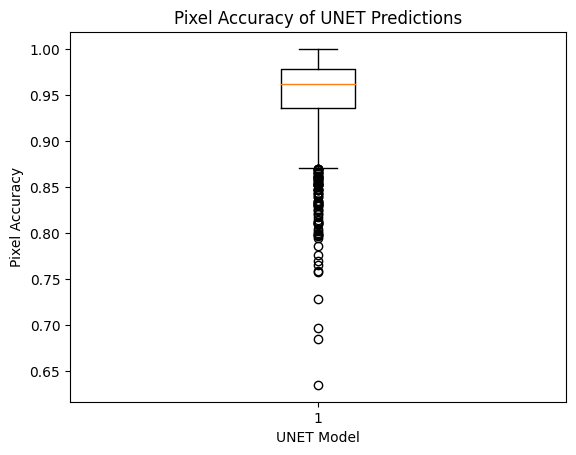

Mean pixel accuracy: 0.9494071445201256
Median pixel accuracy: 0.9614715576171875


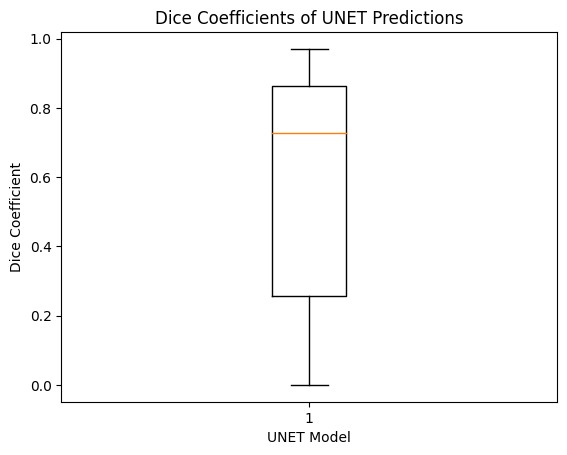

Mean Dice coefficient: 0.569043214933017
Median Dice coefficient: 0.7286264440656448


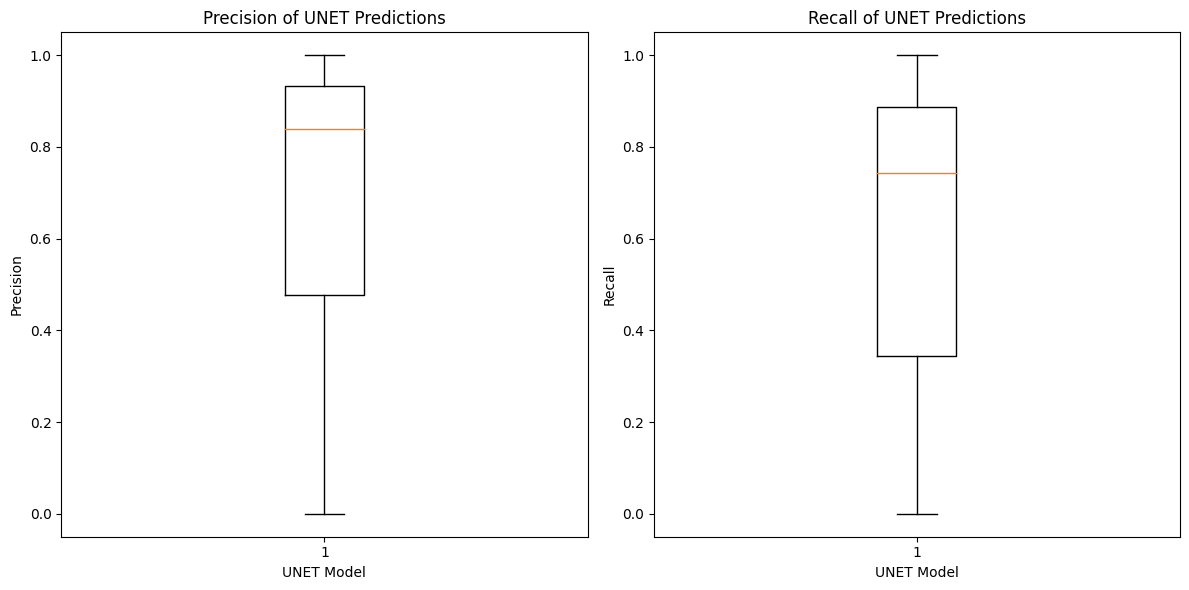

Mean Precision: 0.6689260193743987
Median Precision: 0.839227373403983
Mean Recall: 0.6084146266381418
Median Recall: 0.743052560231684


In [48]:
pixel_acc(mask_dir, post_predict_dir)
dice_coef(mask_dir, post_predict_dir)
precision_recall(mask_dir, post_predict_dir)

Evaluate the training history

In [ ]:
plot_curves(training_history_dir)

Show the first 10 images with predicted mask (with post-processing) along with ground truth

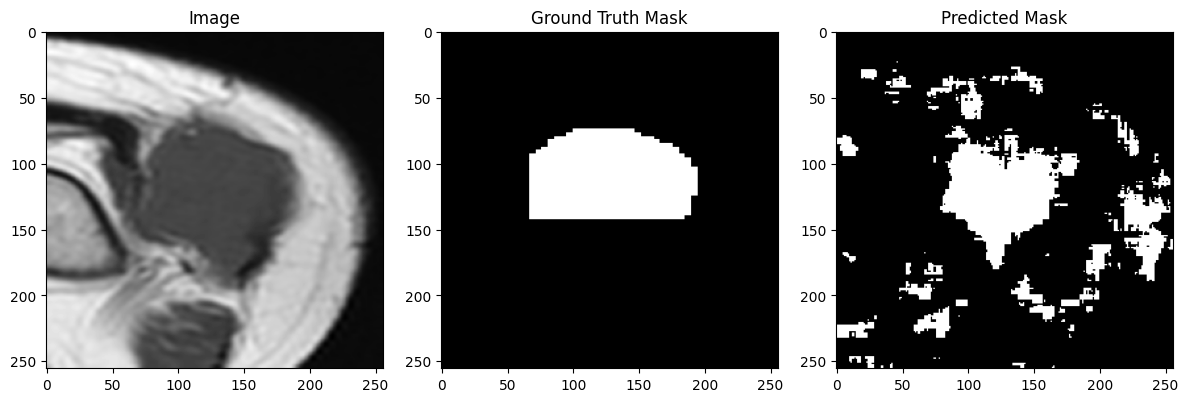

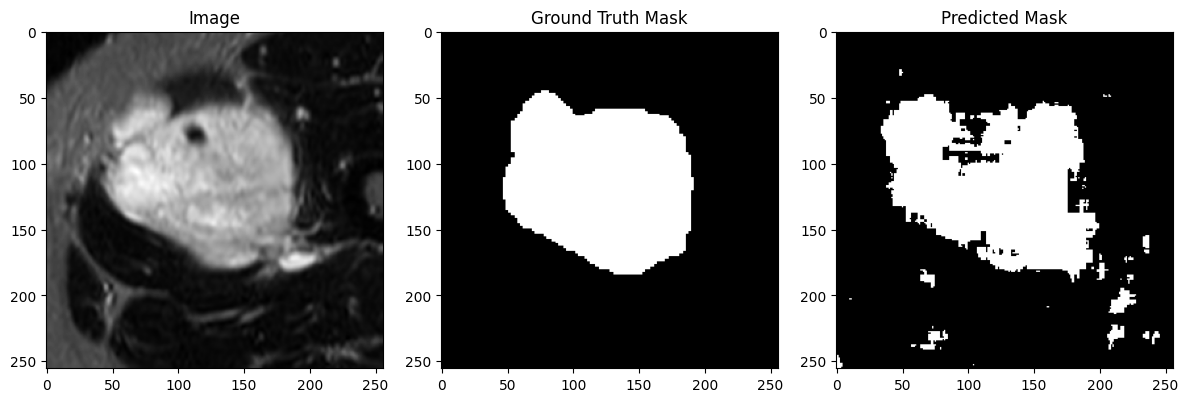

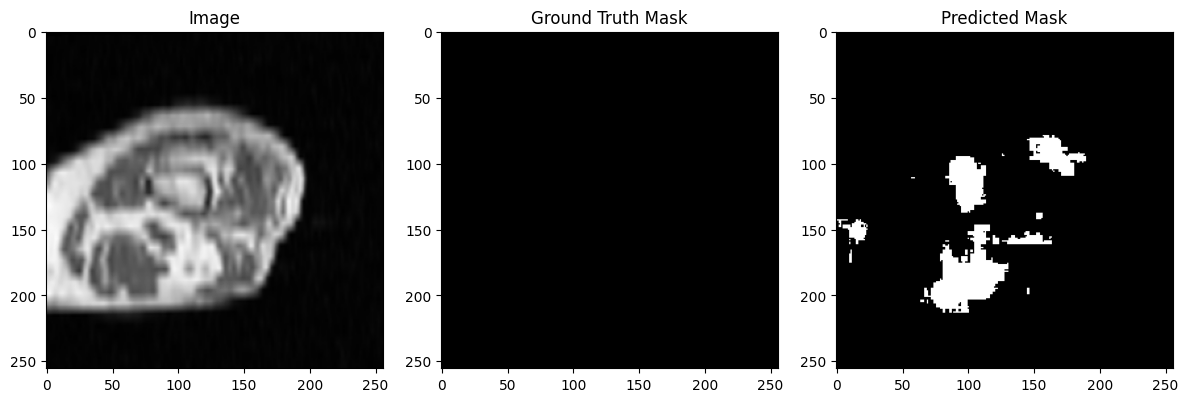

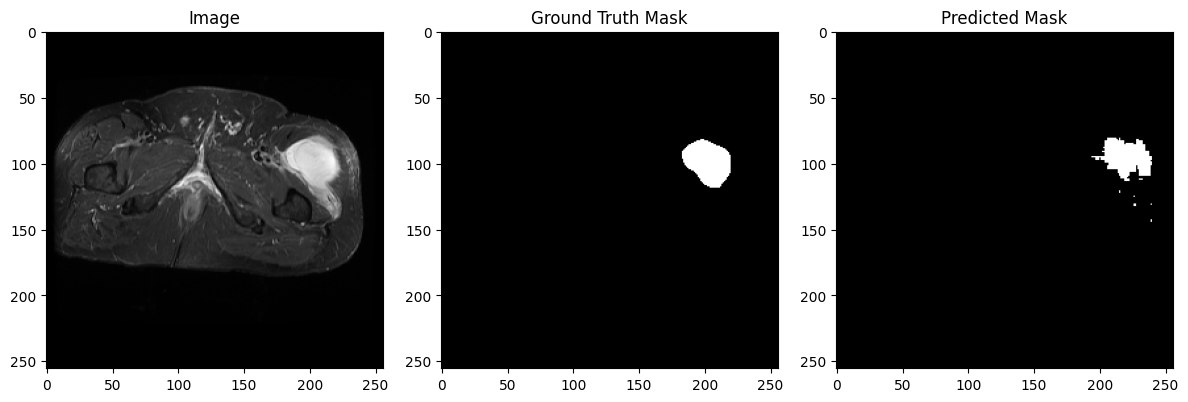

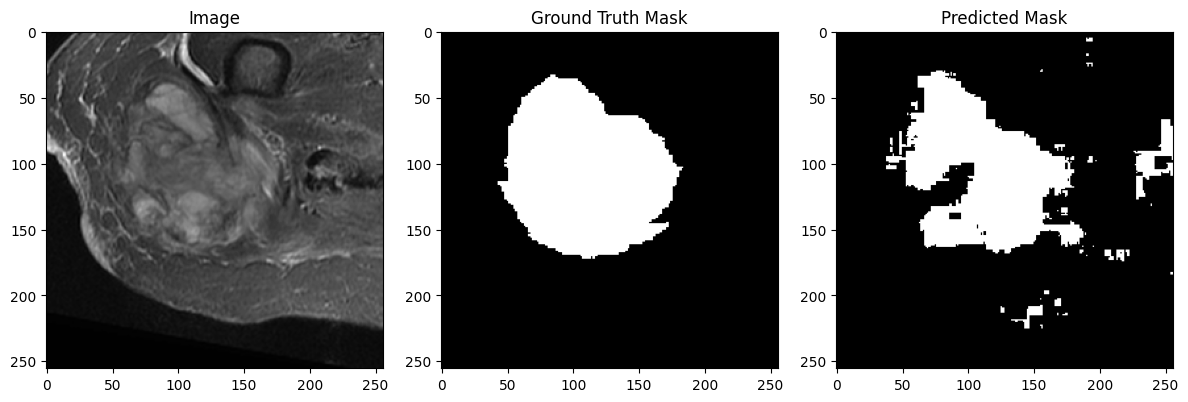

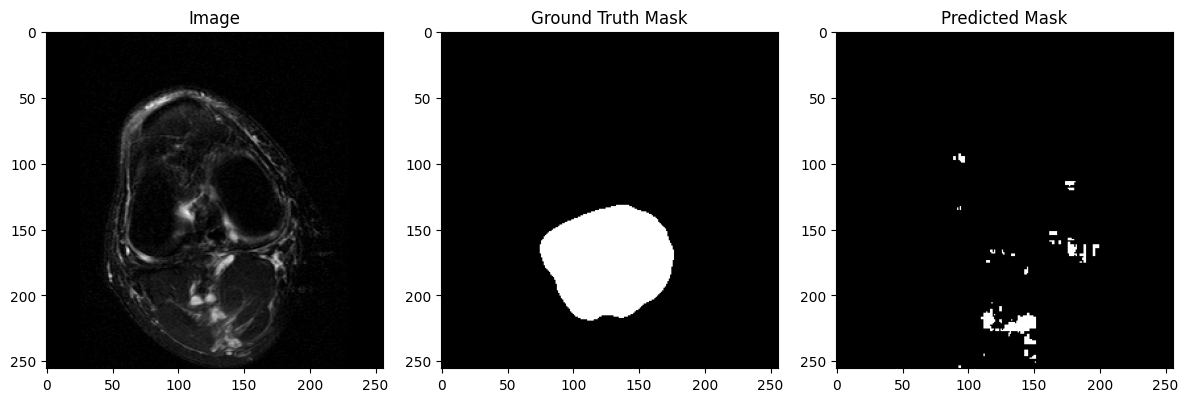

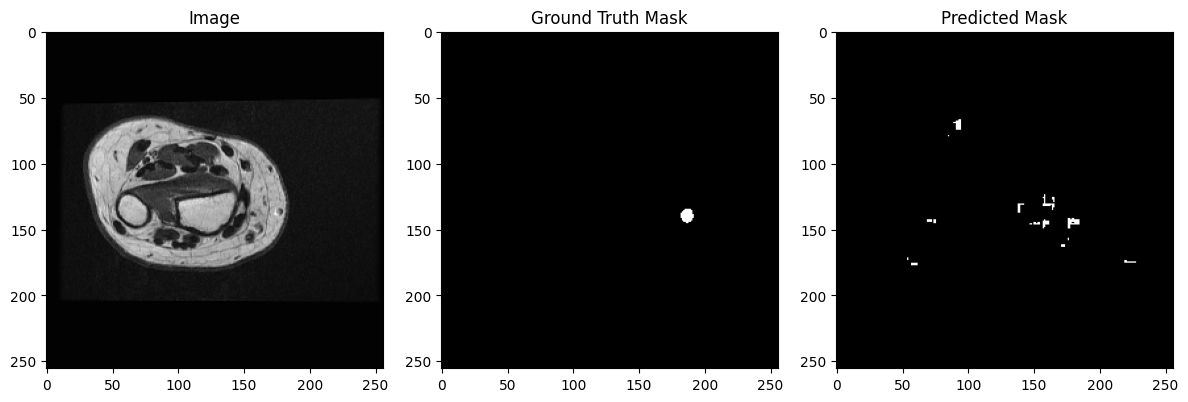

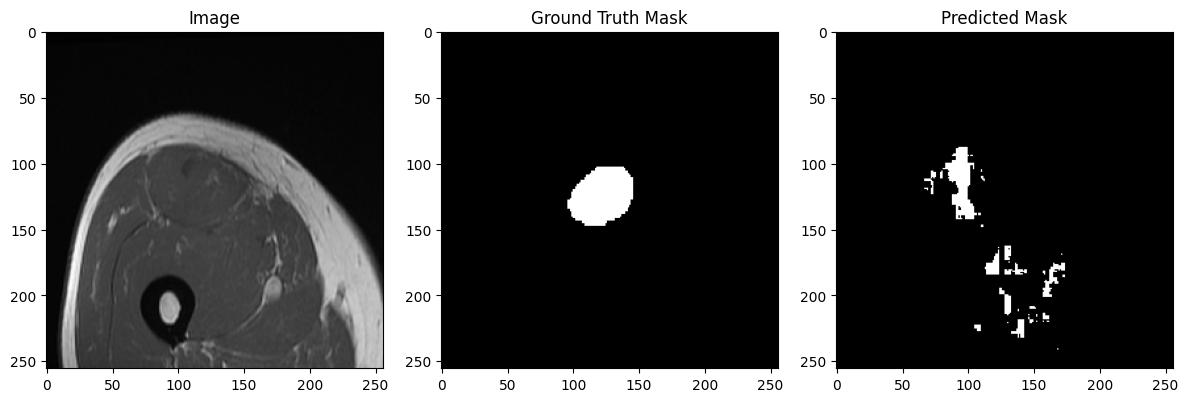

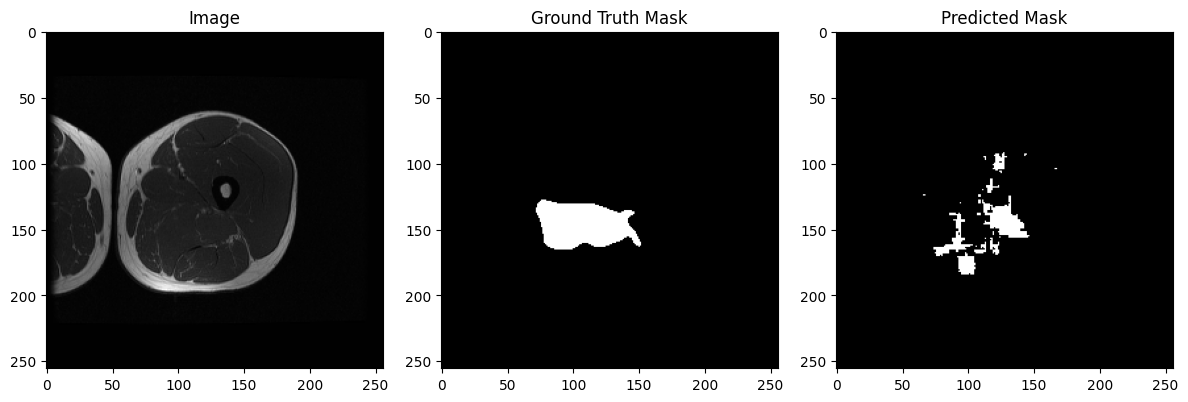

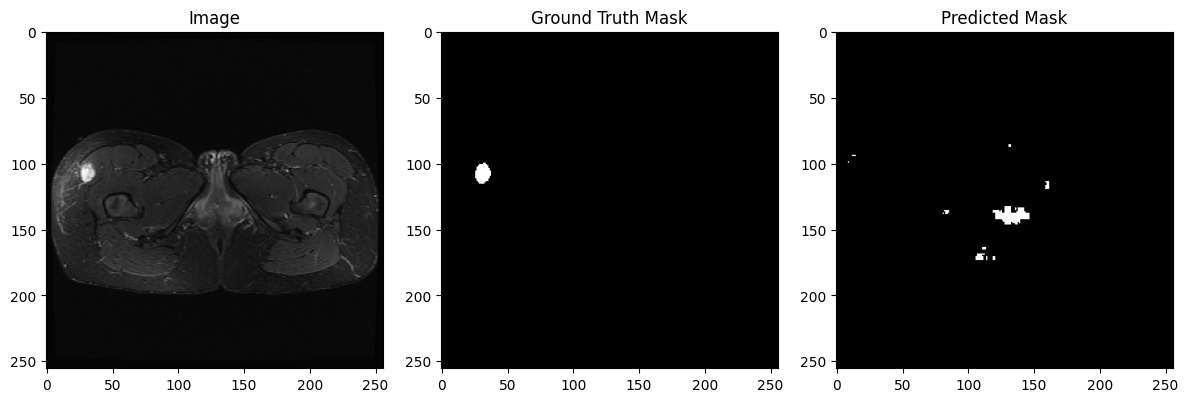

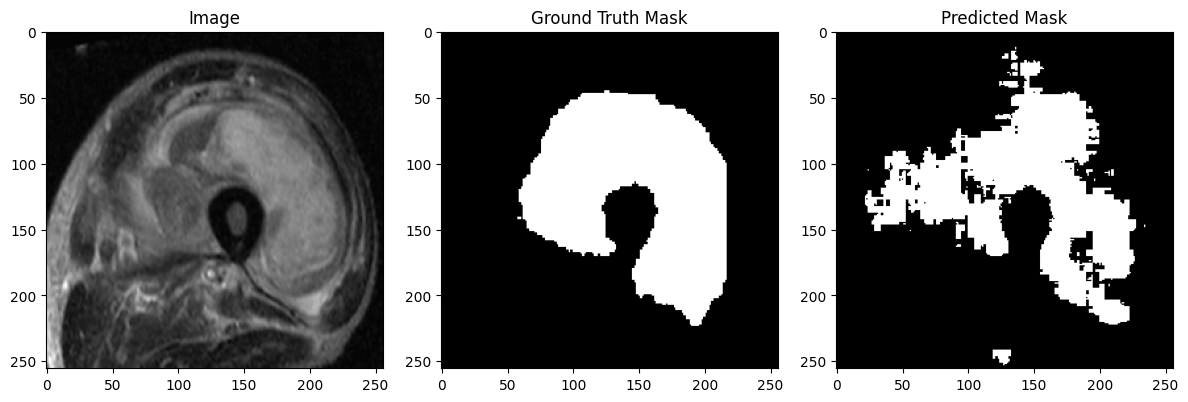

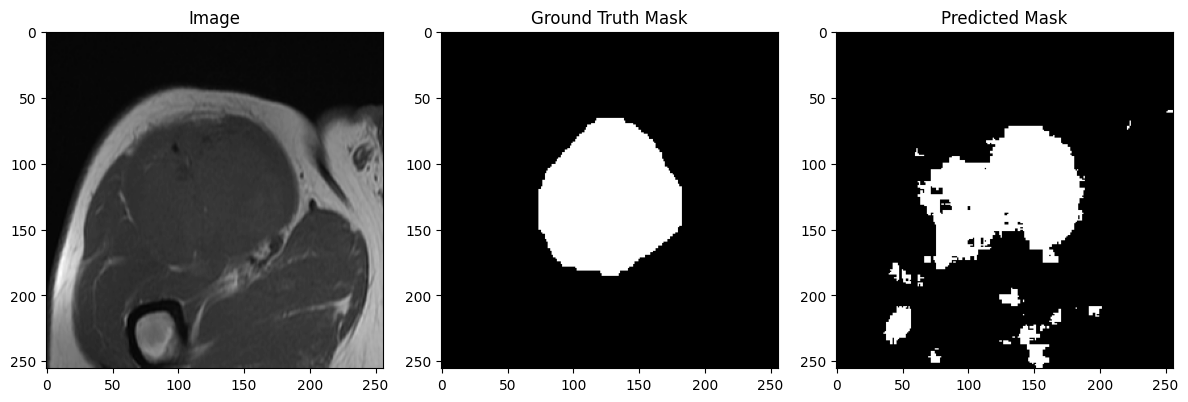

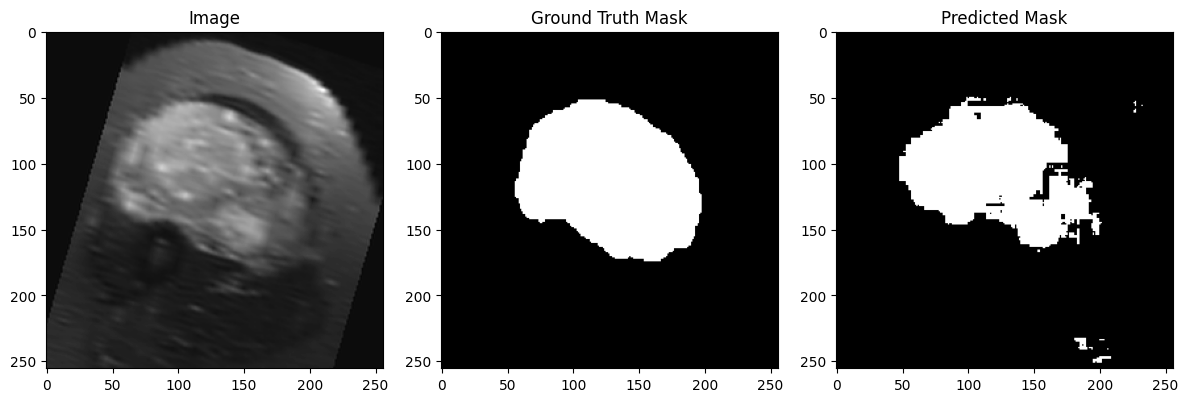

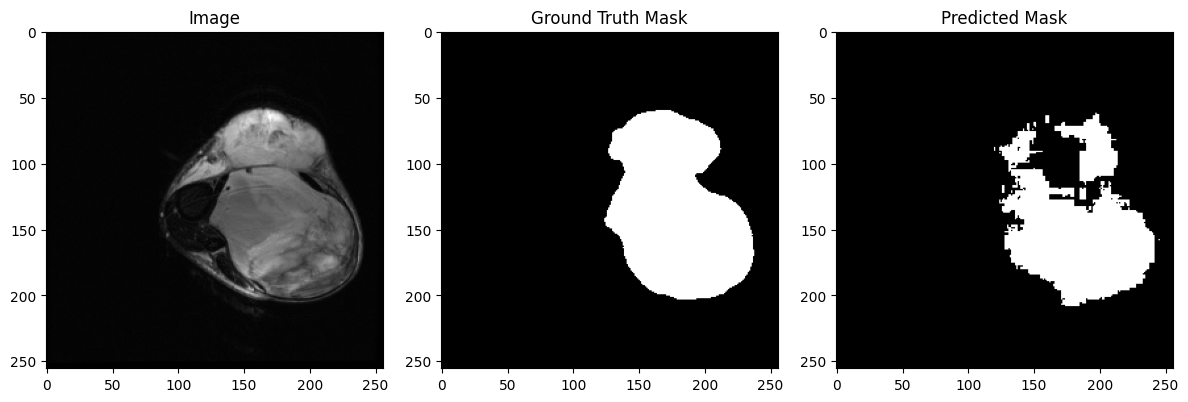

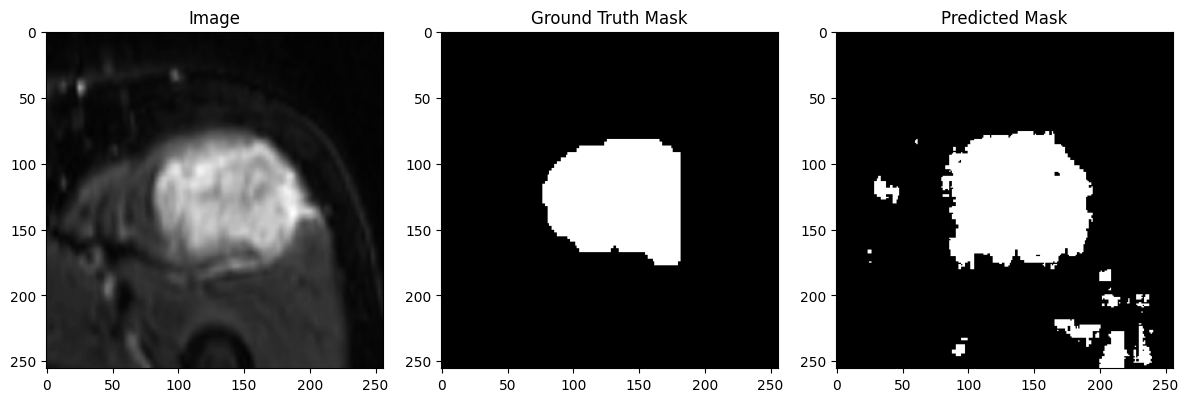

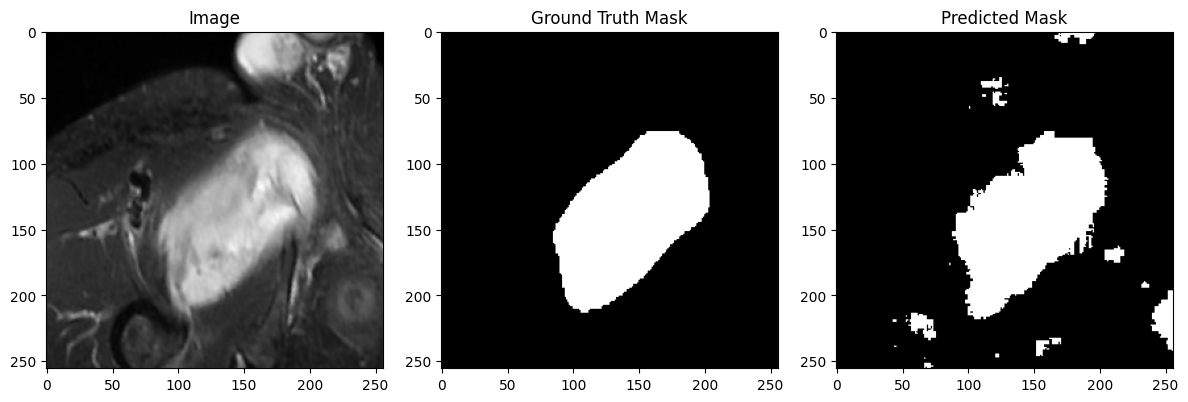

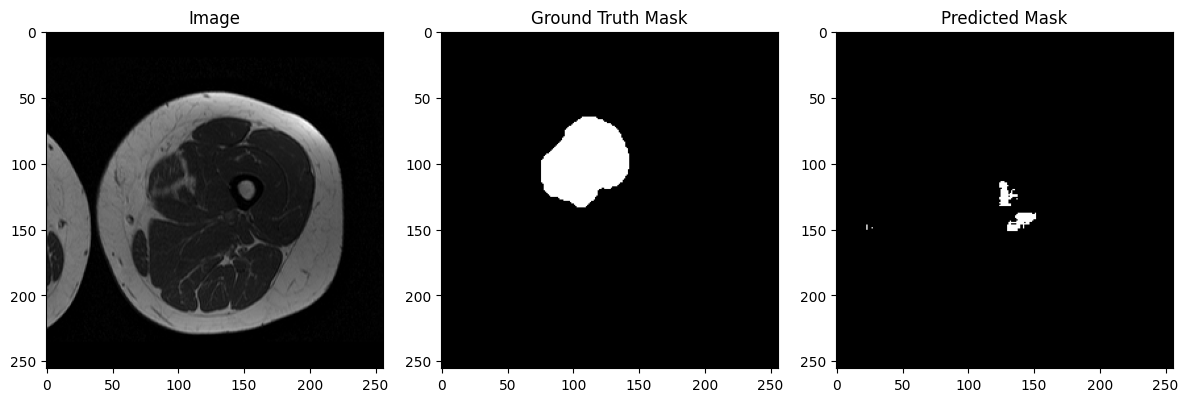

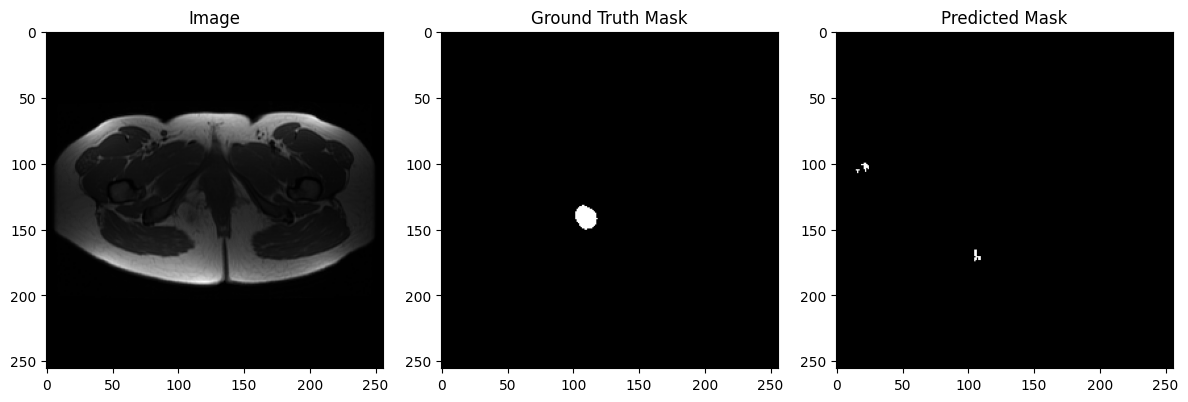

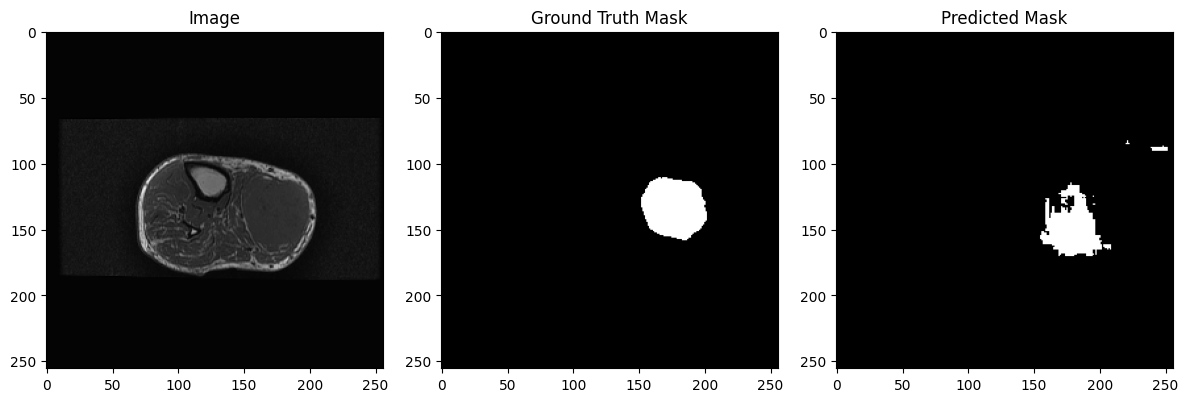

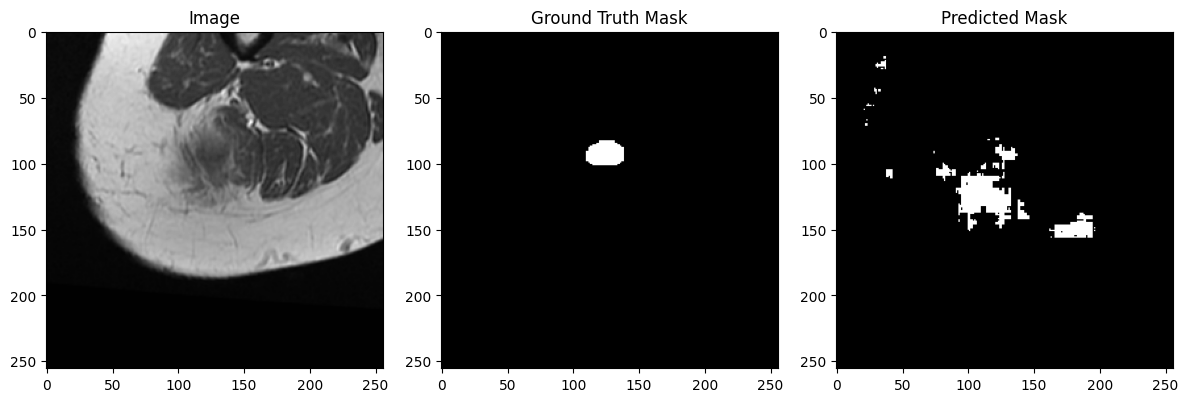

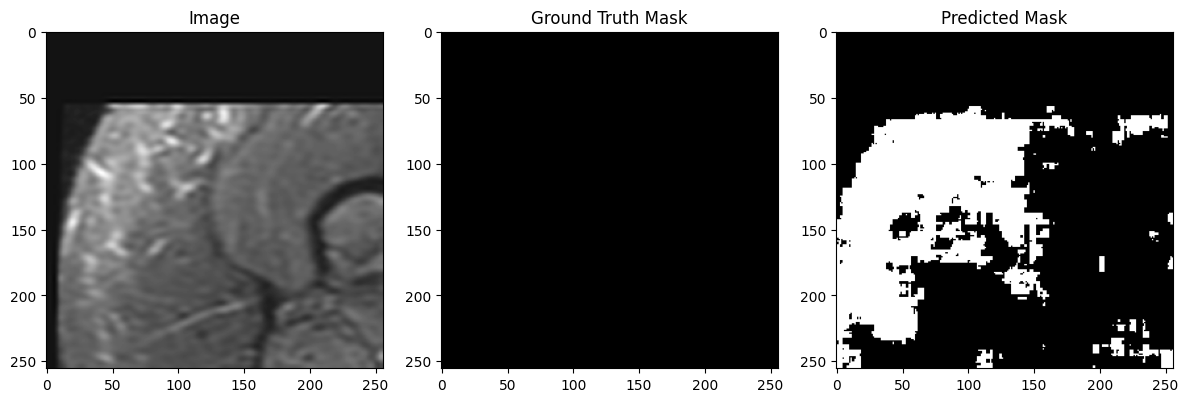

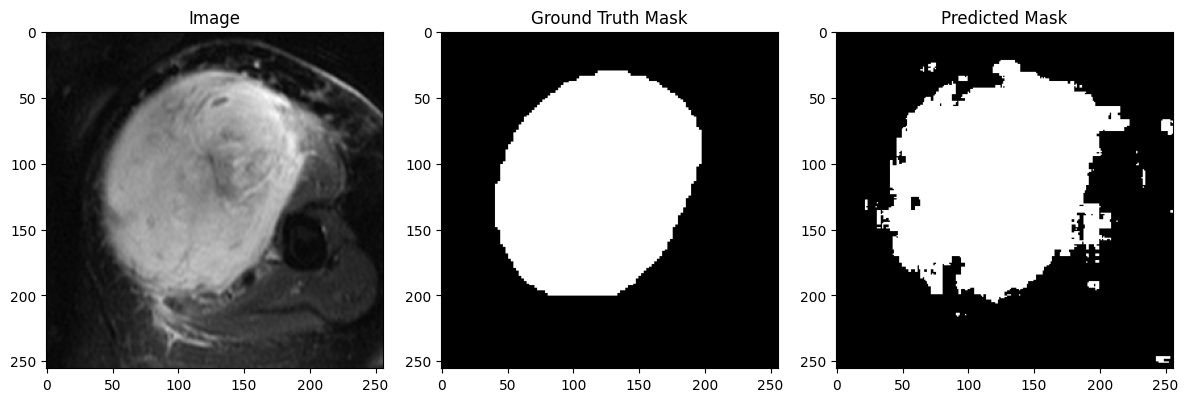

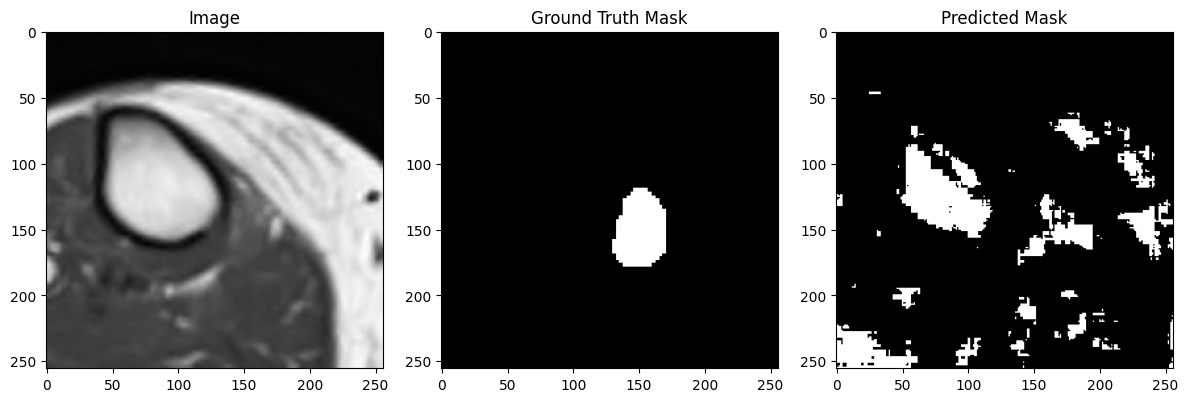

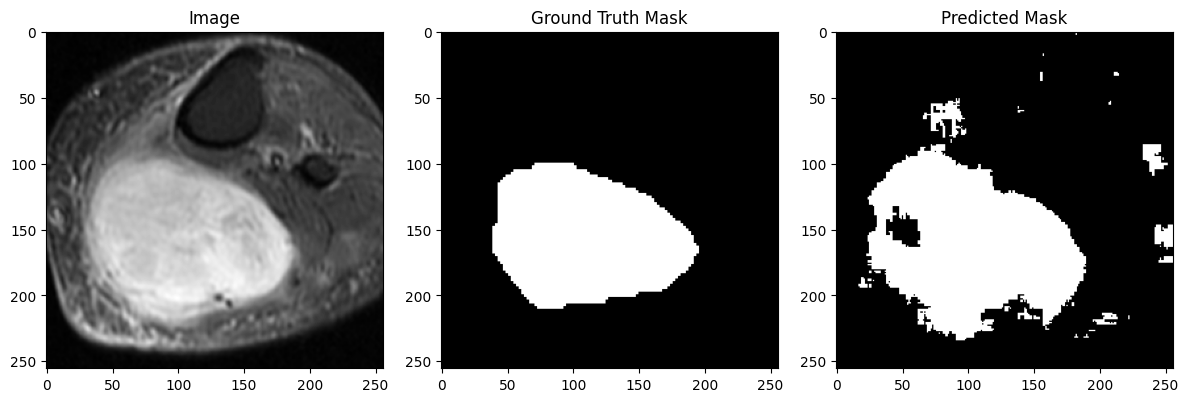

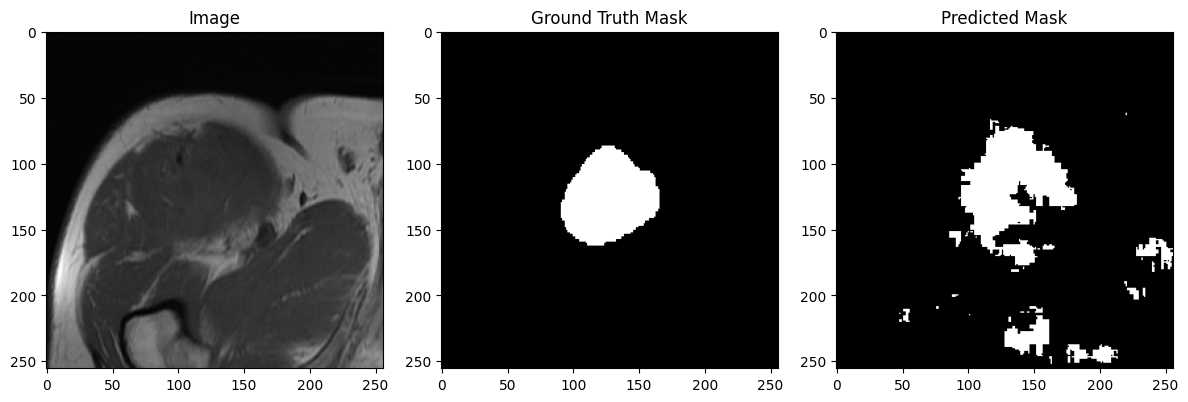

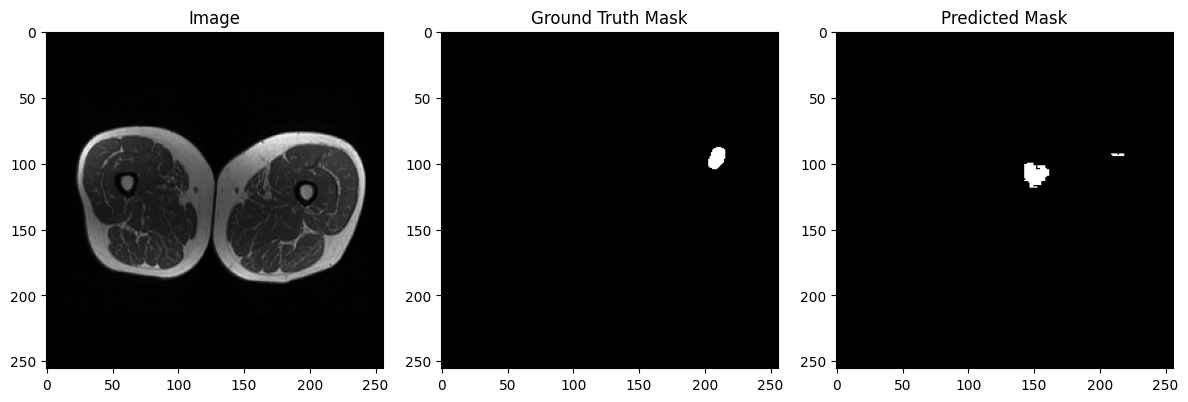

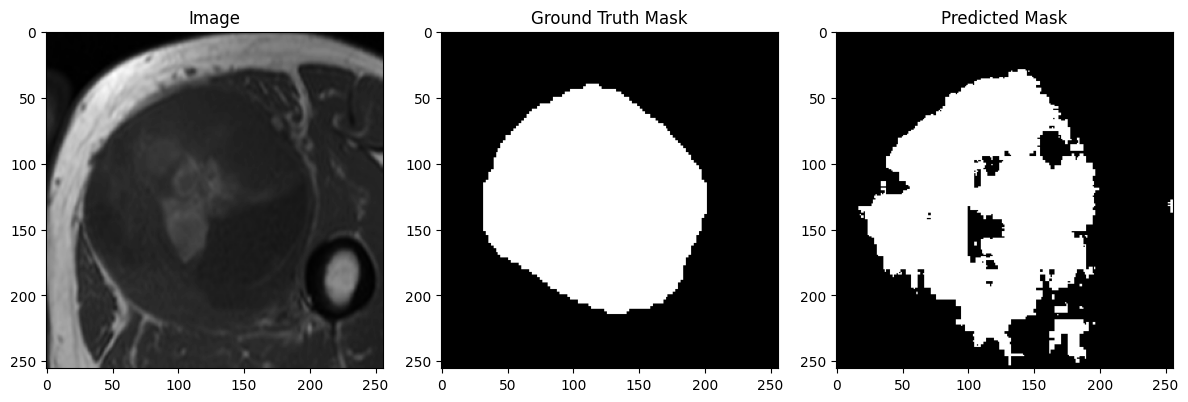

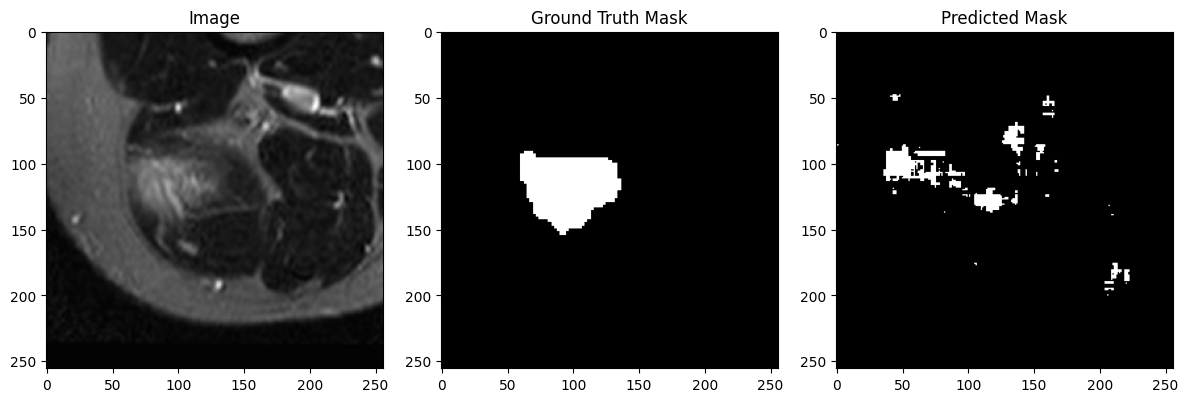

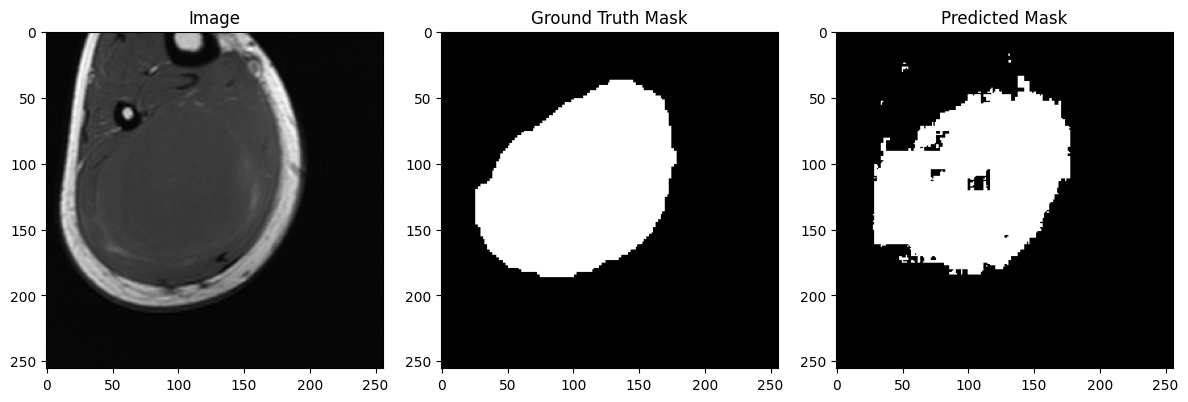

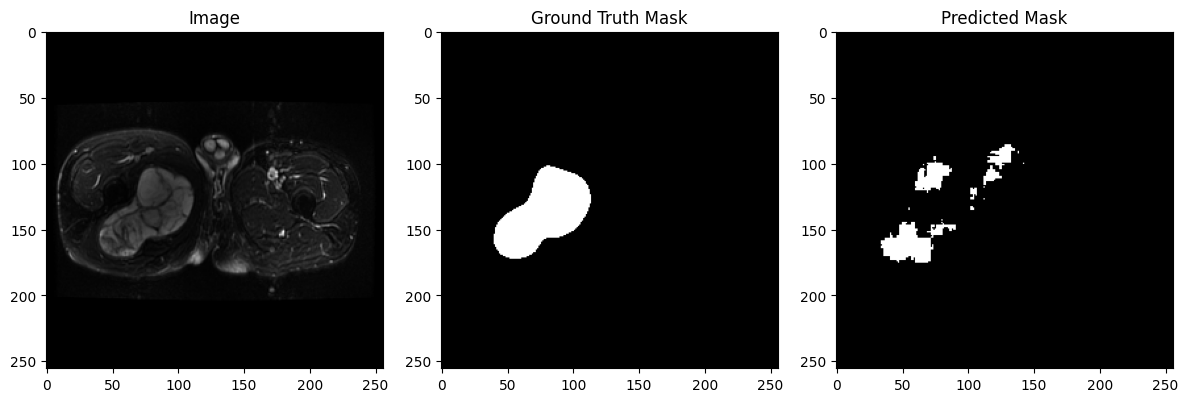

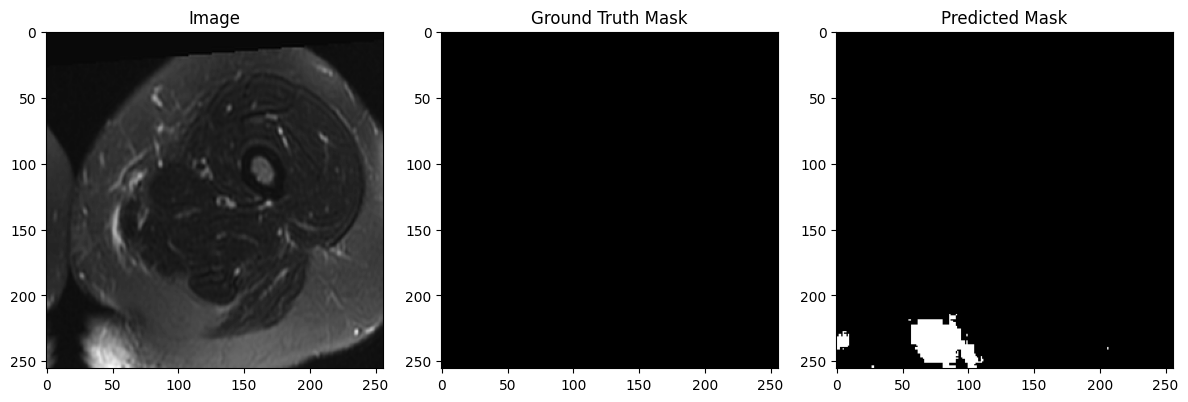

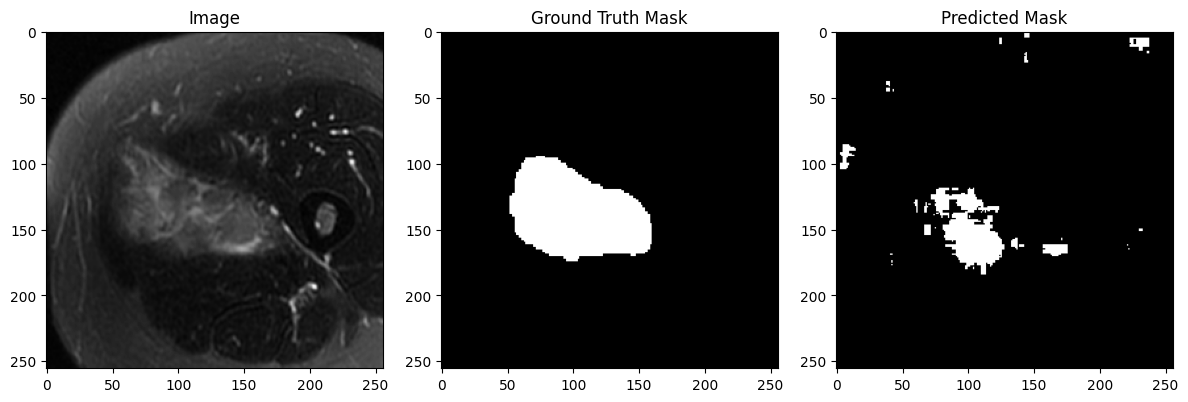

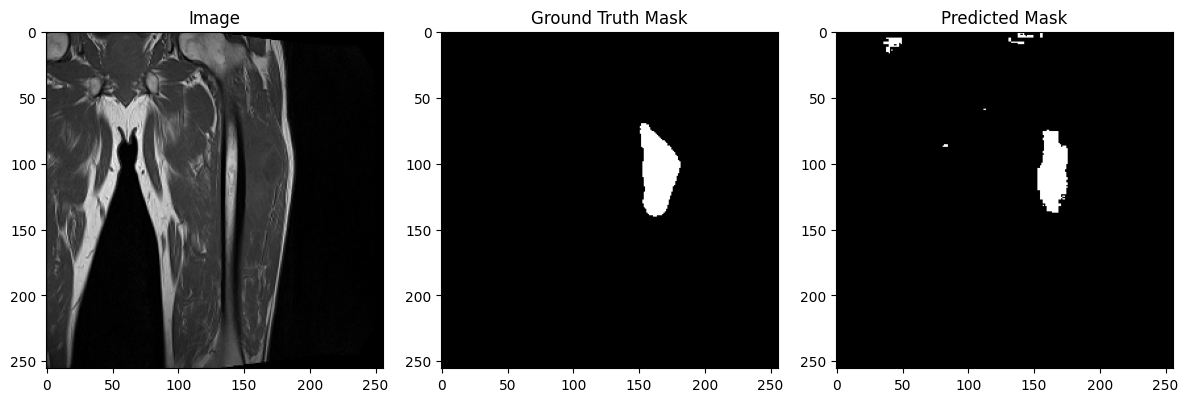

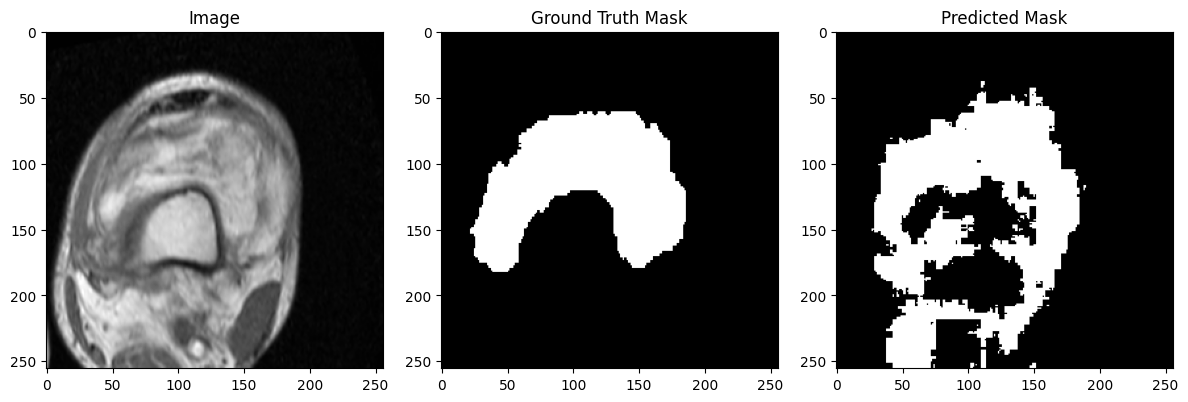

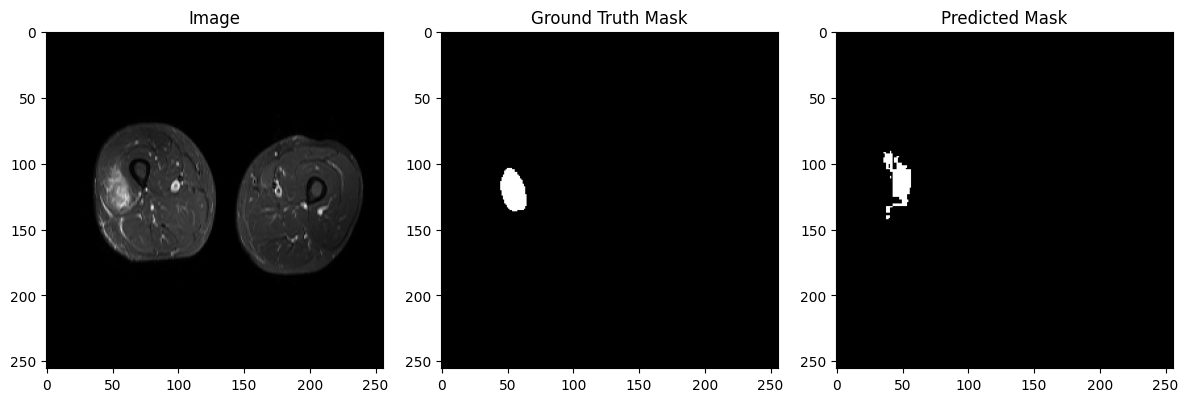

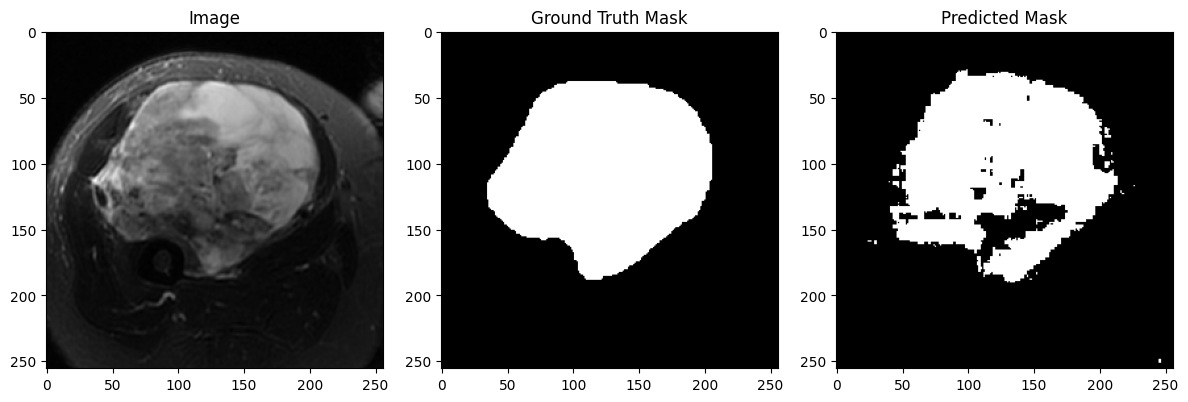

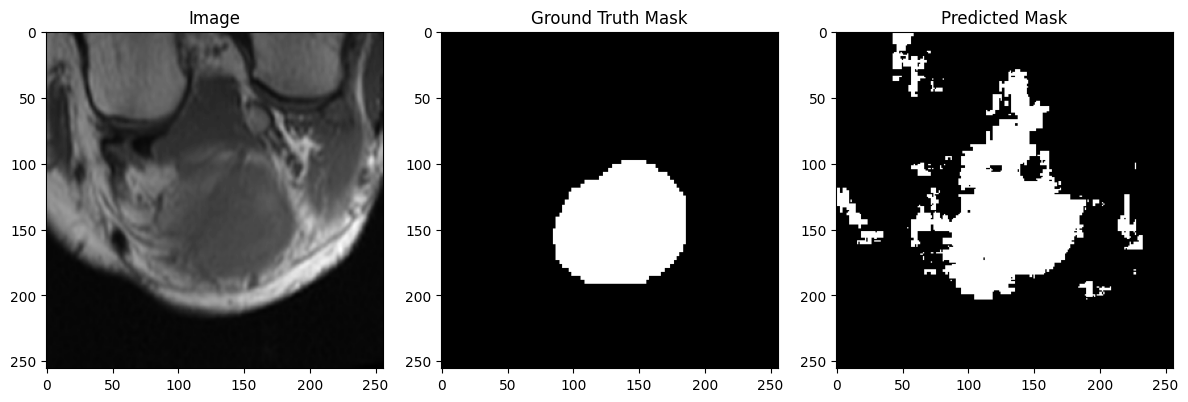

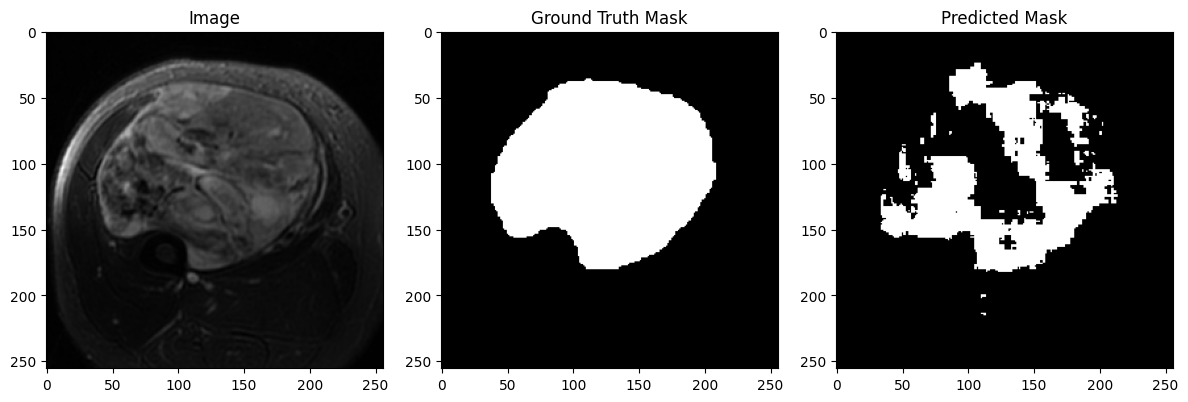

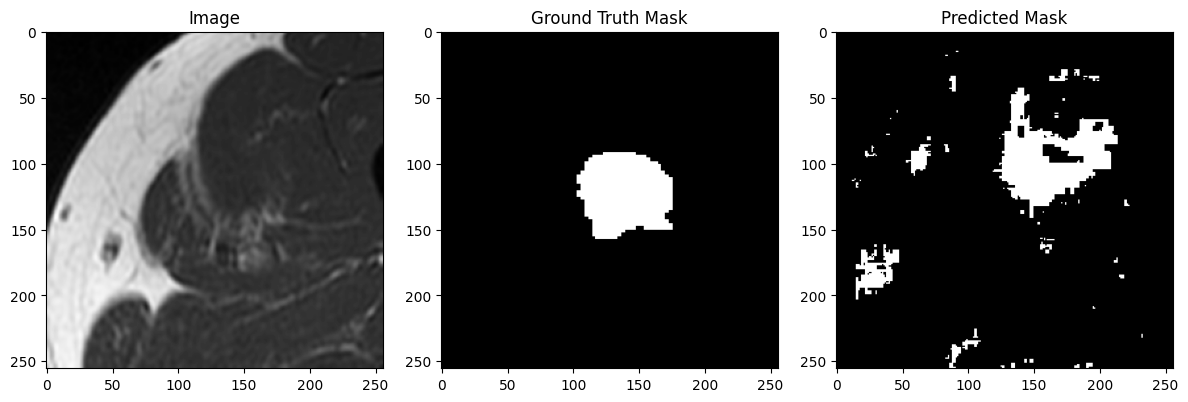

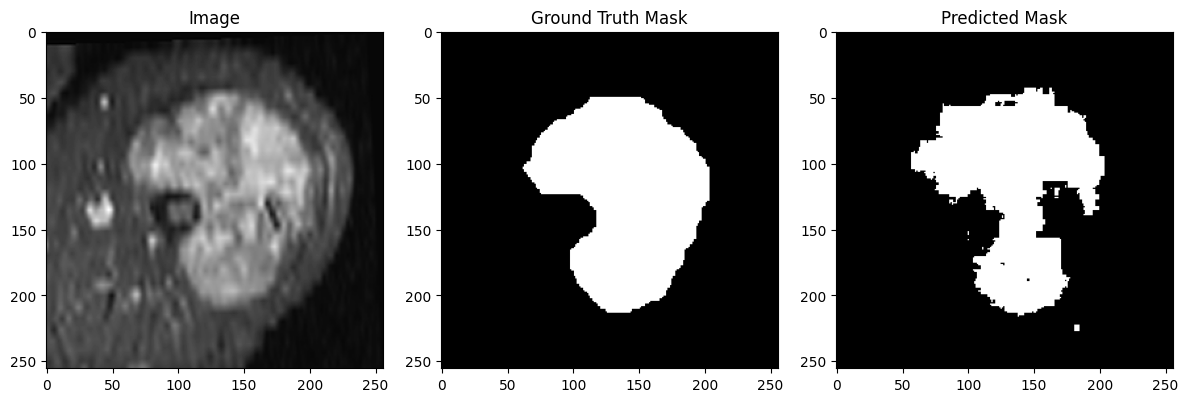

In [22]:
plot_predictions(img_dir, mask_dir, predict_dir, 10)